In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv("__thoughts__/workingdf.csv", index_col=0)


I divide the dataframe in 4 peaces to test 4 Supervised Machine Learning Models:


**FEATURES**: 


- 'Gender'
- 'Age (in years)'
- 'Country of residence', 
- 'Living area',
- 'Children',
- 'Total conform', 
- 'Risk6', 
- 'Education_cat', 
- 'Job_1.0', 'Job_2.0', 'Job_3.0', 'Job_4.0', 'Job_5.0', 'Job_6.0', 'Job_7.0'
   
   
   
   
**TARGETS**:

### 1.- 'Small-scale_NEUTRAL'

### 2.- 'Large-scale_NEUTRAL'

### 3.- 'Small-scale_COVID'

### 4.- 'Large-scale_COVID'

 To analyse run these models, I turn two features into binomial values through get_dummies, then I study correlation

In [6]:
df = pd.get_dummies(data= df, columns=["Country of residence"])
df = pd.get_dummies(data = df, columns = ["Job"])

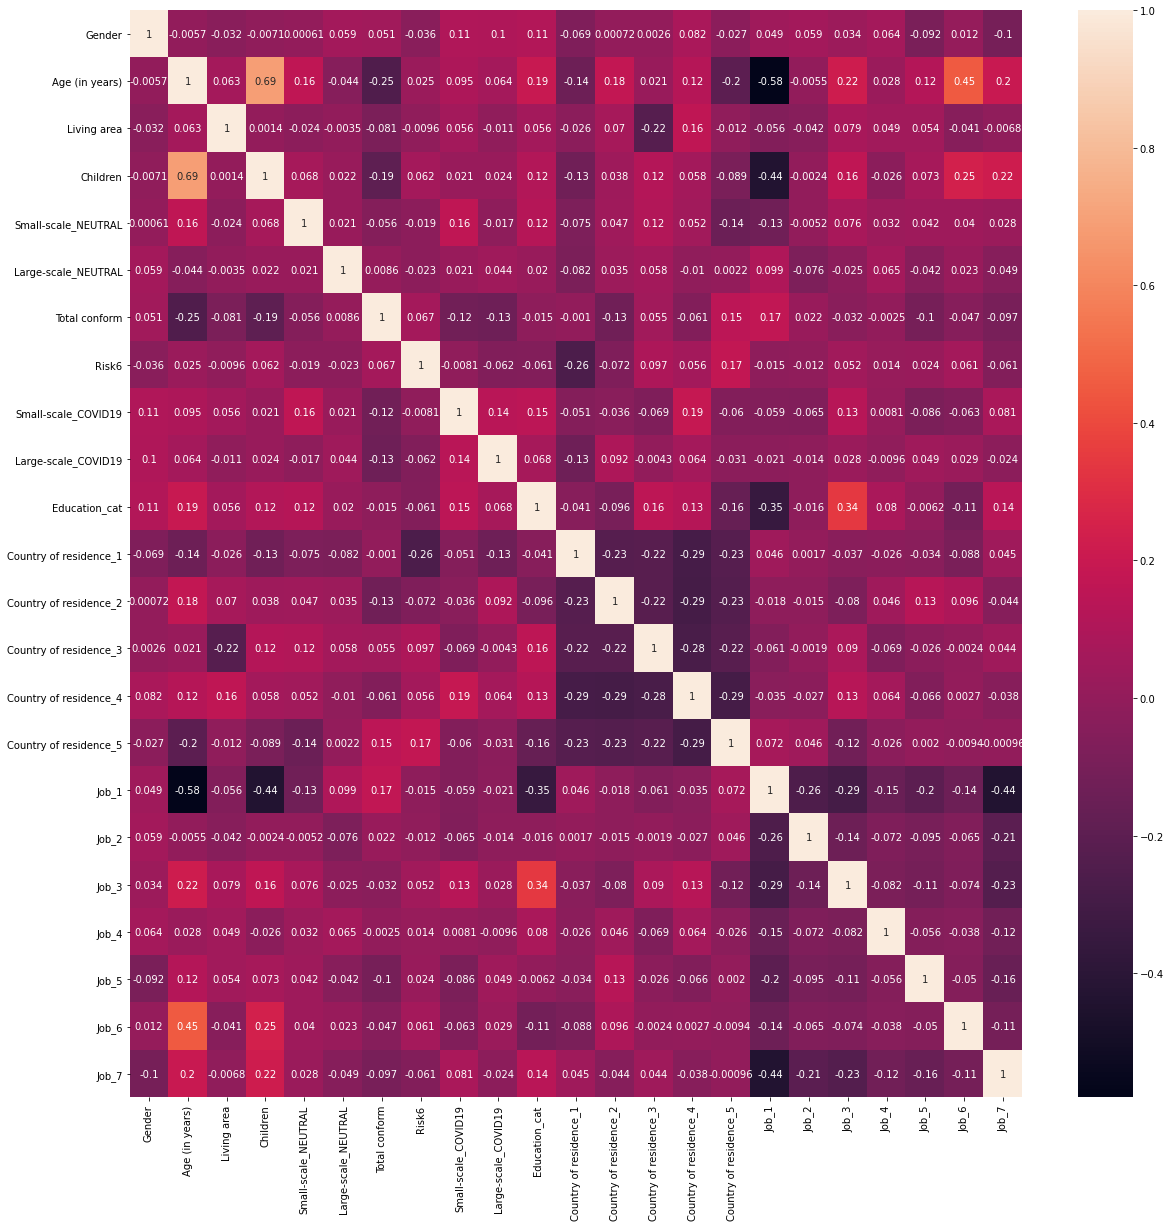

In [7]:
fig, ax = plt.subplots(figsize=(20,20))         
corr = df.corr()
sns.heatmap(corr, annot = True)

**I split the dataset into the four models I want to test: for all of them I will run supervised ml classifications models. 
In order to clean up my results, I do not include in this document each correlation matrix (that was performed for each model), all the models that were test nor grid search that was performed for each one**

**For the last model I also run an unsupervised cluster ML model**

**Finally I test all the targets together with a supervised multilabel ML model**

In [8]:
small_scaleN = df[['Gender', 'Age (in years)', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5', 'Living area',
       'Children', 
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Small-scale_NEUTRAL']]

In [9]:
X_SMN = small_scaleN[['Gender', 'Age (in years)', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5', 'Living area',
       'Children', 
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7']]
y_SMN = small_scaleN[['Small-scale_NEUTRAL']]

In [10]:
small_scaleC = df[['Gender', 'Age (in years)', 'Living area',
       'Children', 
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5','Small-scale_COVID19',]]

In [11]:
X_SMC = small_scaleC[['Gender', 'Age (in years)', 'Living area',
       'Children', 
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5']]
y_SMC = small_scaleC[['Small-scale_COVID19']]

In [12]:
large_scaleN = df[['Gender', 'Age (in years)', 'Living area',
       'Children',
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5', 'Large-scale_NEUTRAL']]

In [13]:
X_LSN = large_scaleN[['Gender', 'Age (in years)', 'Living area',
       'Children',
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5']]
y_LSN = large_scaleN[['Large-scale_NEUTRAL']]

In [14]:
large_scaleC=df[['Gender', 'Age (in years)', 'Living area',
       'Children',
       'Total conform', 'Risk6', 'Education_cat', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5','Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Large-scale_COVID19']]

In [15]:
X_LSC = large_scaleC[['Gender', 'Age (in years)', 'Living area',
       'Children', 
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5']]
y_LSC = large_scaleC[['Large-scale_COVID19']]

## Supervised MLC models

### SMALL SCALE NEUTRAL

In [16]:
X_trainSMN, X_testSMN, y_trainSMN, y_testSMN  = train_test_split(X_SMN ,y_SMN,test_size = 0.2)

In [17]:
SMNmodel = KNeighborsClassifier(algorithm= 'kd_tree', n_neighbors= 10, p = 1, weights= 'distance')
SMNmodel.fit(X_trainSMN,y_trainSMN.values.ravel())
y_predSMN = SMNmodel.predict(X_testSMN)


In [18]:
print("Accuracy",round(accuracy_score(y_testSMN, y_predSMN),3))
print("Precision",round(precision_score(y_testSMN,y_predSMN,average = 'weighted'),3))
print("Recall",round(recall_score(y_testSMN, y_predSMN, average = 'weighted'),3))
print("F1Score",round(f1_score(y_testSMN, y_predSMN, average = 'weighted'),3))
print("ClassificationRepport:\n\n", classification_report(y_testSMN, y_predSMN))


Accuracy 0.716
Precision 0.625
Recall 0.716
F1Score 0.662
ClassificationRepport:

               precision    recall  f1-score   support

           1       0.11      0.04      0.06        24
           2       0.77      0.91      0.83        85

    accuracy                           0.72       109
   macro avg       0.44      0.47      0.45       109
weighted avg       0.62      0.72      0.66       109



In [19]:
scores = cross_val_score(SMNmodel, X_SMN, y_SMN.values.ravel(), cv=15)
print(f"acccuracy={np.mean(scores)}")

acccuracy=0.7695695695695696


### SMALL SCALE COVID-19

In [20]:
X_trainSMC, X_testSMC, y_trainSMC, y_testSMC  = train_test_split(X_SMC ,y_SMC,test_size = 0.2)

In [21]:
SMCmodel = RandomForestClassifier(bootstrap= True, max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators = 200)
SMCmodel.fit(X_trainSMC,y_trainSMC.values.ravel())
y_predSMC = SMNmodel.predict(X_testSMC)

In [22]:
print("Accuracy",round(accuracy_score(y_testSMC, y_predSMC),3))
print("Precision",round(precision_score(y_testSMC,y_predSMC,average = 'weighted'),3))
print("Recall",round(recall_score(y_testSMC, y_predSMC, average = 'weighted'),3))
print("F1Score",round(f1_score(y_testSMC, y_predSMC, average = 'weighted'),3))
print("ClassificationRepport:\n\n", classification_report(y_testSMC, y_predSMC))


Accuracy 0.807
Precision 0.652
Recall 0.807
F1Score 0.721
ClassificationRepport:

               precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.81      1.00      0.89        88

    accuracy                           0.81       109
   macro avg       0.40      0.50      0.45       109
weighted avg       0.65      0.81      0.72       109



In [23]:
scores = cross_val_score(SMCmodel, X_SMC, y_SMC.values.ravel(), cv=15)
print(f"acccuracy={np.mean(scores)}")

acccuracy=0.7822822822822822


### LARGE SCALE NEUTRAL

In [24]:
X_trainLSN, X_testLSN, y_trainLSN, y_testLSN  = train_test_split(X_LSN ,y_LSN,test_size = 0.2)

In [25]:
LSNmodel = RandomForestClassifier(bootstrap= True, max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators = 200)
LSNmodel.fit(X_trainLSN,y_trainLSN.values.ravel())
y_predLSN = LSNmodel.predict(X_testLSN)

In [26]:
print("Accuracy",round(accuracy_score(y_testLSN, y_predLSN),3))
print("Precision",round(precision_score(y_testLSN, y_predLSN,average = 'weighted'),3))
print("Recall",round(recall_score(y_testLSN, y_predLSN, average = 'weighted'),3))
print("F1Score",round(f1_score(y_testLSN, y_predLSN, average = 'weighted'),3))
print("ClassificationRepport:\n\n", classification_report(y_testLSN, y_predLSN))


Accuracy 0.936
Precision 0.876
Recall 0.936
F1Score 0.905
ClassificationRepport:

               precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.94      1.00      0.97       102

    accuracy                           0.94       109
   macro avg       0.47      0.50      0.48       109
weighted avg       0.88      0.94      0.90       109



In [27]:
scores = cross_val_score(SMCmodel, X_LSN, y_LSN.values.ravel(), cv=15)
print(f"acccuracy={np.mean(scores)}")

acccuracy=0.9096596596596596


### LARGE SCALE COVID-19

In [28]:
X_trainLSC, X_testLSC, y_trainLSC, y_testLSC  = train_test_split(X_LSC,y_LSC,test_size = 0.2)

In [29]:
LSCmodel = RandomForestClassifier(bootstrap= True, max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators = 200)
LSCmodel.fit(X_trainLSC,y_trainLSC.values.ravel())
y_predLSC = LSCmodel.predict(X_testLSC)

In [30]:
print("Accuracy",round(accuracy_score(y_testLSC, y_predLSC),3))
print("Precision",round(precision_score(y_testLSC, y_predLSC,average = 'weighted'),3))
print("Recall",round(recall_score(y_testLSC, y_predLSC, average = 'weighted'),3))
print("F1Score",round(f1_score(y_testLSC, y_predLSC, average = 'weighted'),3))
print("ClassificationRepport:\n\n", classification_report(y_testLSC, y_predLSC))


Accuracy 0.505
Precision 0.509
Recall 0.505
F1Score 0.496
ClassificationRepport:

               precision    recall  f1-score   support

           1       0.49      0.64      0.56        53
           2       0.53      0.38      0.44        56

    accuracy                           0.50       109
   macro avg       0.51      0.51      0.50       109
weighted avg       0.51      0.50      0.50       109



In [31]:
scores = cross_val_score(LSCmodel, X_LSC, y_LSC.values.ravel(), cv=15)
print(f"acccuracy={np.mean(scores)}")

acccuracy=0.4592592592592592


## Unsupervised MLC model for Large-scale Covid-19 dataset
### What's going on?


In [32]:
def onezero(x):
    if x == 2:
        return 0
    else:
        return x
        

In [33]:
large_scaleC["Large-scale_COVID19"] = large_scaleC["Large-scale_COVID19"].apply(onezero)

In [34]:
model = KMeans(n_clusters=4)
labels = model.fit_predict(large_scaleC.drop(columns=["Large-scale_COVID19"]))
large_scaleC["label"] = labels
large_scaleC.head()
large_scaleC["label"].value_counts()
large_scaleC["Large-scale_COVID19"].value_counts()

1    283
0    259
Name: Large-scale_COVID19, dtype: int64

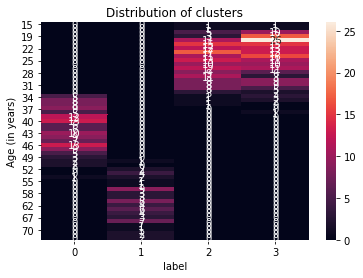

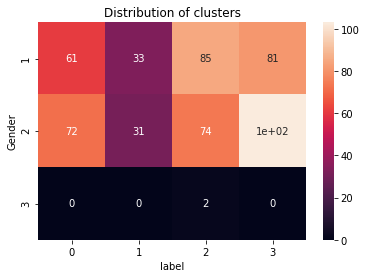

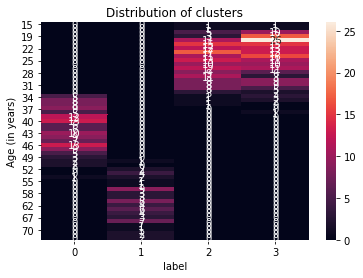

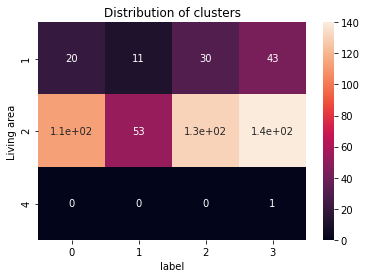

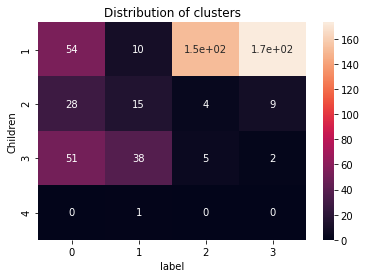

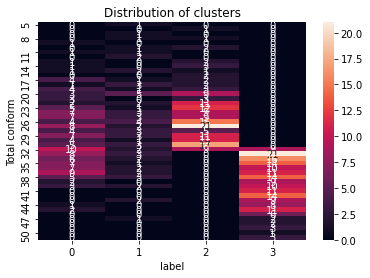

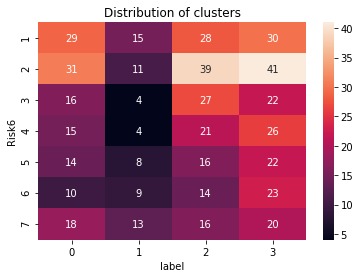

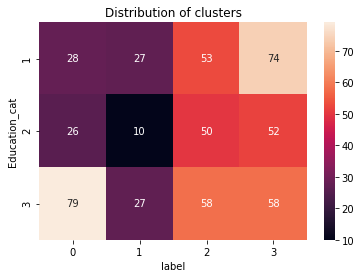

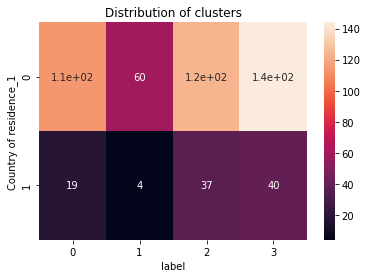

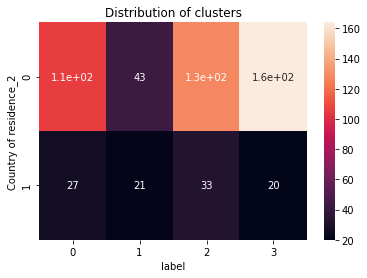

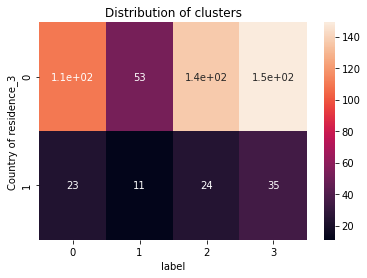

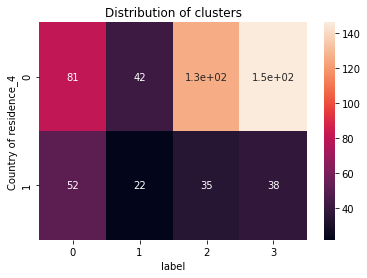

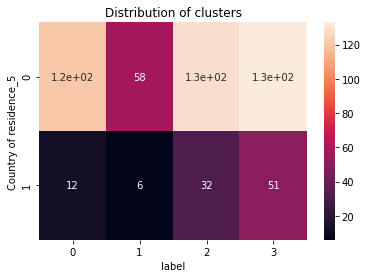

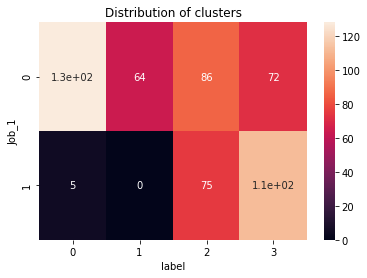

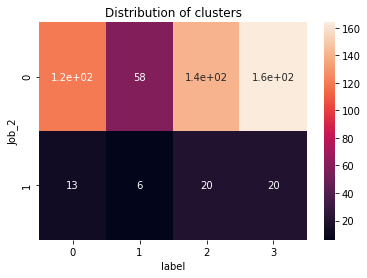

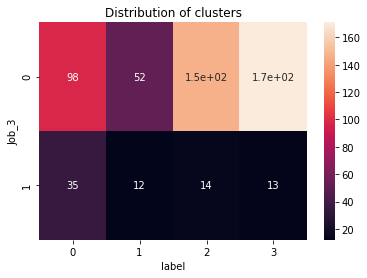

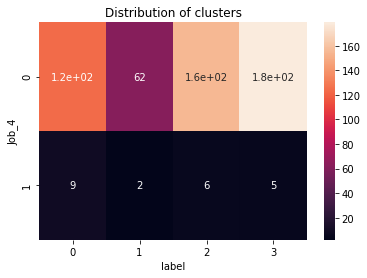

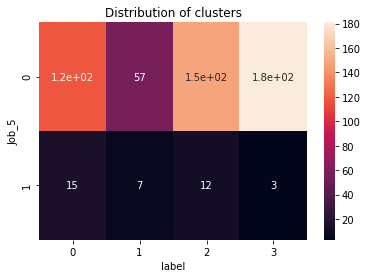

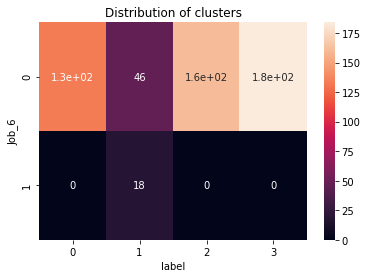

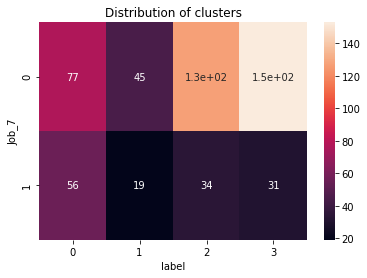

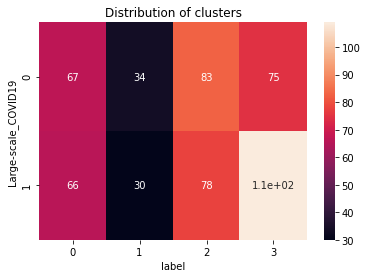

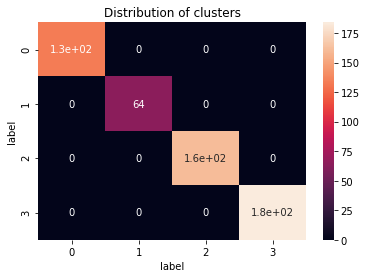

In [35]:
ct = pd.crosstab(large_scaleC["Age (in years)"],large_scaleC["label"])
plt.title("Distribution of clusters")
sns.heatmap(ct, annot = True)
for col in large_scaleC.columns:
    plt.figure()
    ct = pd.crosstab(large_scaleC[col],large_scaleC["label"])
    plt.title("Distribution of clusters")
    sns.heatmap(ct, annot = True)

## FINALLY MULTILABEL MODEL WITH THE FOUR PREDICTIONS
### It does not work but here it is


In [36]:
X = df[['Gender', 'Age (in years)', 'Living area', 'Children','Total conform', 'Risk6','Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7',
       'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5']]
y = df[['Small-scale_NEUTRAL', 'Large-scale_NEUTRAL','Small-scale_COVID19', 'Large-scale_COVID19']]

In [37]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size = 0.2)


In [38]:
model = KNeighborsClassifier(algorithm= 'kd_tree', n_neighbors= 10, p = 1, weights= 'distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy",round(accuracy_score(y_test, y_pred),3))


Accuracy 0.303


In [39]:
scores = cross_val_score(model, X, y, cv=15)
print(f"acccuracy={np.mean(scores)}")

acccuracy=0.2930930930930931
